In [1]:
#importing all the necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

In [2]:
# Using MNIST digits dataset for image classification
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
#Checking the dimension of training and testing dataset
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)

X_train: (60000, 28, 28)
X_test: (10000, 28, 28)


In [6]:
#Storing the names of all the possible digits whose images are present in the dataset
numbers = ["ZERO","ONE","TWO","THREE","FOUR","FIVE","SIX","SEVEN","EIGHT","NINE"]

In [7]:
#Defining a function to plot images of the digits stored in the dataset
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(numbers[y[index]])

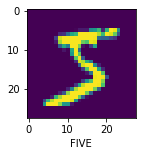

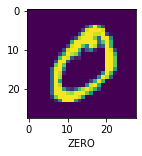

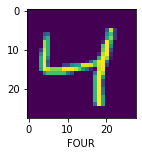

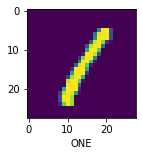

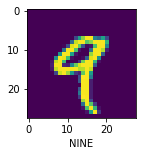

In [8]:
#Plotting images of few digits present in the training dataset 
for i in range(5):
  plot_sample(X_train, y_train, i)

In [9]:
#Normalizing X_train and X_test dataset 
X_train = X_train / 255
X_test = X_test / 255

In [10]:
#Reshaping X_train and X_test dataset
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)

X_train: (60000, 28, 28, 1)
X_test: (10000, 28, 28, 1)


In [12]:
#Creating a CNN model using LENET-5 architecture
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=(28,28,1), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='sigmoid') #Output layer
])

In [14]:
lenet_5_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

lenet_5_model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2294 - accuracy: 0.9313
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0860 - accuracy: 0.9735
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0584 - accuracy: 0.9817
Epoch 4/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0441 - accuracy: 0.9865
Epoch 5/5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0359 - accuracy: 0.9885


In [16]:
y_pred =lenet_5_model.predict(X_test)
y_pred[:5]

array([[3.3136904e-02, 4.6586278e-01, 4.4566417e-01, 9.6305907e-01,
        4.0347695e-02, 2.7762085e-01, 3.3022665e-05, 9.9999583e-01,
        7.5283140e-02, 9.3376648e-01],
       [9.5004499e-01, 8.8353395e-01, 9.9999845e-01, 7.5534642e-01,
        1.5912652e-03, 7.4900687e-03, 6.8556225e-01, 3.5618901e-02,
        3.0520496e-01, 1.2683868e-03],
       [4.5630693e-02, 9.9999863e-01, 4.0583789e-02, 3.7517399e-02,
        5.7342100e-01, 1.2191385e-02, 7.5070149e-01, 3.1325561e-01,
        8.2176411e-01, 5.5812448e-02],
       [9.9999070e-01, 1.3429523e-03, 6.9790131e-01, 4.4626710e-01,
        1.0897672e-01, 6.9047689e-01, 9.9068654e-01, 2.7937663e-01,
        2.0806390e-01, 7.6411521e-01],
       [8.5860074e-02, 1.2258142e-02, 9.3648762e-02, 1.1194885e-02,
        9.9999785e-01, 2.6668996e-02, 6.9379878e-01, 6.1751020e-01,
        3.1811261e-01, 9.6047699e-01]], dtype=float32)

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
pred=y_classes[:5]
act=y_test[:5]
print("Predicted Numbers:",pred)
print("Predicted Numbers:",act)

Predicted Numbers: [7, 2, 1, 0, 4]
Predicted Numbers: [7 2 1 0 4]


Text(69.0, 0.5, 'Actual')

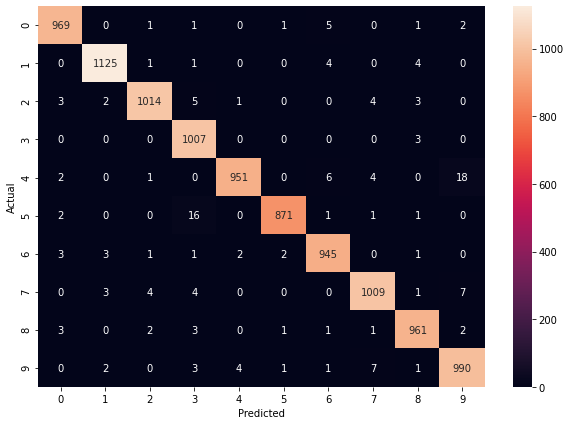

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [25]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = lenet_5_model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.98      0.99       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Hence, using LENET-5 architecture of CNN we are getting accuuracy of 98%(approx.)